## 콜레스테롤 예측 모델(실패) ##

In [75]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

In [76]:
# 1. CSV 파일 불러오기
file_path = "./data/health_2023_cleaned_final.csv"
df = pd.read_csv(file_path, encoding='utf-8', sep=',')

In [77]:
df = pd.read_csv('./data/health_2023_cleaned_final.csv', encoding='utf-8')
df = df[['성별코드', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '총콜레스테롤']].dropna()

In [78]:
X = df.drop(columns='총콜레스테롤').values
y = df['총콜레스테롤'].values

In [79]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)  # (샘플 수, 타임스텝, 채널)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [82]:
# 4. MLP 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # 회귀 출력
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 5. 학습
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
6655/6655 ━━━━━━━━━━━━━━━━━━━━ 5s 675us/step - loss: 5720.9434 - mae: 52.7481 - val_loss: 1599.2290 - val_mae: 31.6122
Epoch 2/50
6655/6655 ━━━━━━━━━━━━━━━━━━━━ 4s 655us/step - loss: 1616.4805 - mae: 31.8207 - val_loss: 1594.1277 - val_mae: 31.6304
Epoch 3/50
6655/6655 ━━━━━━━━━━━━━━━━━━━━ 4s 649us/step - loss: 1621.1858 - mae: 31.8515 - val_loss: 1594.6487 - val_mae: 31.5558
Epoch 4/50
6655/6655 ━━━━━━━━━━━━━━━━━━━━ 4s 649us/step - loss: 1619.1002 - mae: 31.8462 - val_loss: 1598.3101 - val_mae: 31.6367
Epoch 5/50
6655/6655 ━━━━━━━━━━━━━━━━━━━━ 4s 651us/step - loss: 1604.6610 - mae: 31.6866 - val_loss: 1611.7655 - val_mae: 31.9007
Epoch 6/50
6655/6655 ━━━━━━━━━━━━━━━━━━━━ 4s 666us/step - loss: 1608.3289 - mae: 31.7331 - val_loss: 1600.9979 - val_mae: 31.5697
Epoch 7/50
6655/6655 ━━━━━━━━━━━━━━━━━━━━ 4s 668us/step - loss: 1617.8795 - mae: 31.7761 - val_loss: 1598.7358 - val_mae: 31.5062
Epoch 8/50
6655/6655 ━━━━━━━━━━━━━━━━━━━━ 4s 658us/step - loss: 1614.1093 - mae: 31.7693 -

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# 1. 데이터 불러오기
df = pd.read_csv("./data/health_2023_cleaned_final.csv")

# 2. 파생 변수 생성
df['BMI'] = (df['체중(5kg단위)'] + 2.5) / ((df['신장(5cm단위)'] + 2.5) / 100) ** 2
df['허리신장비'] = df['허리둘레'] / (df['신장(5cm단위)'] + 2.5)

# 3. 결측치 제거
required_cols = [
    '연령대코드(5세단위)', '성별코드', '신장(5cm단위)', '체중(5kg단위)', '허리둘레',
    '흡연상태', '음주여부', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
    'BMI', '허리신장비', 'HDL콜레스테롤', '치아우식증유무', '치석'
]
df = df.dropna(subset=required_cols)

# 4. 입력 / 출력 정의
X = df[[
    '연령대코드(5세단위)', '성별코드', '신장(5cm단위)', '체중(5kg단위)', '허리둘레',
    '흡연상태', '음주여부', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
    'BMI', '허리신장비', '치아우식증유무', '치석'
]]
y = np.log1p(df['HDL콜레스테롤'])  # 로그 변환 적용

# 5. 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 7. 모델 정의 및 학습
model = XGBRegressor(n_estimators=200, max_depth=4, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# 8. 예측 및 성능 평가
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # 로그 복원
y_true = np.expm1(y_test)

print(f"[HDL콜레스테롤 예측 결과 - XGBoost]")
print(f"R²: {r2_score(y_true, y_pred):.4f}")


[HDL콜레스테롤 예측 결과 - XGBoost]
R²: 0.2285


In [84]:
import tensorflow as tf
print(tf.__version__)  # 2.15.1 이 출력돼야 함
print(dir(tf))   

2.19.0
['AggregationMethod', 'Assert', 'CriticalSection', 'DType', 'DeviceSpec', 'GradientTape', 'Graph', 'IndexedSlices', 'IndexedSlicesSpec', 'Module', 'Operation', 'OptionalSpec', 'RaggedTensor', 'RaggedTensorSpec', 'RegisterGradient', 'SparseTensor', 'SparseTensorSpec', 'Tensor', 'TensorArray', 'TensorArraySpec', 'TensorShape', 'TensorSpec', 'TypeSpec', 'UnconnectedGradients', 'Variable', 'VariableAggregation', 'VariableSynchronization', '_API_MODULE', '_KerasLazyLoader', '__all__', '__builtins__', '__cached__', '__compiler_version__', '__cxx11_abi_flag__', '__cxx_version__', '__doc__', '__file__', '__git_version__', '__internal__', '__loader__', '__monolithic_build__', '__name__', '__operators__', '__package__', '__path__', '__spec__', '__version__', '_api', '_compat', '_current_file_location', '_current_module', '_fi', '_initializers', '_inspect', '_kernel_dir', '_ll', '_losses', '_major_api_version', '_metrics', '_module_dir', '_module_util', '_name', '_names_with_underscore', '

In [85]:
# 5. 예측 및 성능 평가
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 MAE:", mae)
print("📊 RMSE:", rmse)
print("📈 R²:", r2)

📊 MAE: 0.16987108992094166
📊 RMSE: 0.21432103157700064
📈 R²: 0.23571937062846893


## 테스트 ##

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# 1. 모델 정의
baseline_model = LinearRegression()

# 2. 학습
baseline_model.fit(X_train, y_train)

# 3. 예측
y_pred_log = baseline_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# 4. R² 평가
r2_linear = r2_score(y_true, y_pred)
print(f"Linear Regression R²: {r2_linear:.4f}")


Linear Regression R²: 0.2105


In [88]:
r2_xgb = r2
improvement = (r2_xgb - r2_linear) / abs(r2_linear) * 100
print(f"XGBoost 성능 향상: {improvement:.1f}%")

XGBoost 성능 향상: 12.0%


        Feature  Importance
4          허리둘레    0.565416
1          성별코드    0.177216
6          음주여부    0.066053
10          BMI    0.052672
11        허리신장비    0.038211
5          흡연상태    0.020214
9    식전혈당(공복혈당)    0.017561
0   연령대코드(5세단위)    0.014996
3     체중(5kg단위)    0.012986
13           치석    0.009320
7         수축기혈압    0.007934
8         이완기혈압    0.007542
12      치아우식증유무    0.005103
2     신장(5cm단위)    0.004776


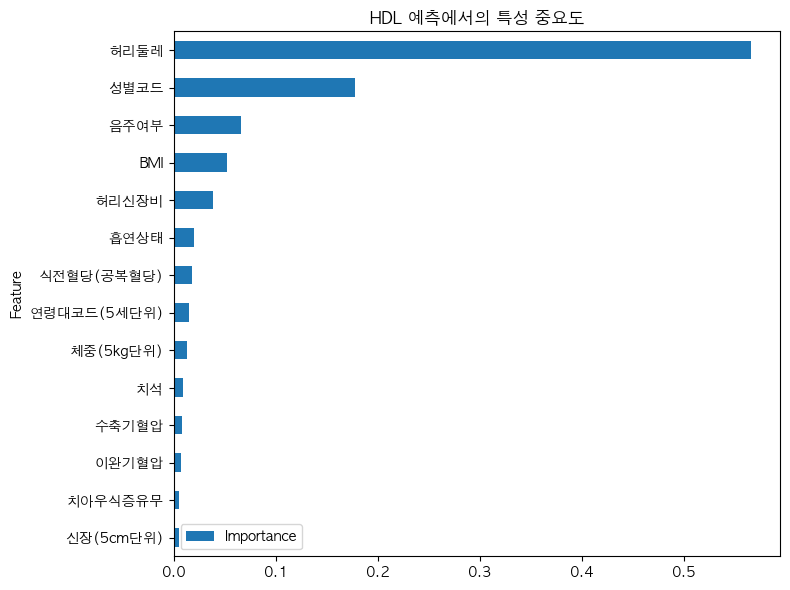

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.family'] = 'AppleGothic'

# 특성 중요도 시각화
importances = model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_df)

feat_df.plot(kind='barh', x='Feature', y='Importance', figsize=(8, 6), title='HDL 예측에서의 특성 중요도')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()